In [190]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageFilter
from skimage.util import random_noise
import os

In [191]:
2894/(681*731)

0.0058134512897465105

In [192]:
def padding(image):
    row=image.shape[0]
    col=image.shape[1]

    new_image = np.zeros([row+4,col+4],dtype='float')
    for i in range(row+4):
        for j in range(col+4):
            if i==0 or i==row+2 or i==1 or i==row+3:
                new_image[i,j]=0
            elif j==0 or j==col+2 or j==1 or j==col+3:
                new_image[i,j]=0
            else:
                new_image[i,j]=image[i-2,j-2]
    return new_image

In [193]:
# a = 0.45
# b = 0.75

# p = 1





def fracdiff(image, new_image, p, a, m, n):
    
    g = math.gamma(2-a)
    
    C0 = p/g
    C1 = (-1*(p*((2**(1-a))-2)))/g
    C2 = p*((3**(1-a))-(2**(2-a))+1)/g
    
    total = (8*C0)+(8*C1)+(8*C2)
    
    mask = np.zeros([5,5],dtype='float')
    for i in range(5):
        for j in range(5):
            if i==2 and j==2:
                mask[i][j]=(8*C0)/total
            elif i==0 and j%2==0:
                mask[i][j]=C2/total
            elif i%2==0 and j==0:
                mask[i][j]=C2/total
            elif i==4 and j%2==0:
                mask[i][j]=C2/total
            elif j==4 and i%2==0:
                mask[i][j]=C2/total   
            elif i==0 and j%2==1 or i==4 and j%2==1 or j==0 and i%2==1 or j==4 and i%2==1:
                mask[i][j]=0
            else:
                mask[i][j]=C1/total
                
                
#     output = np.zeros(image.shape,float)
    result=0
    for x in range(-2, 3):
        for y in range(-2, 3):
            result = result + new_image[m+x, n+y]*mask[x+2,y+2]
        output[m-2][n-2] = result
       
        result = 0

   
    #convolution
    
                
#     output = np.zeros(image.shape,float)
#     result = 0
#     #convolution
#     for i in range(1,row-1):
#             for j in range(1,col-1):
#                 for x in range(-1, 2):
#                     for y in range(-1, 2):
#                         result = result + new_image[i+x, j+y]*mask[x+1,y+1]
#                 output[i-1][j-1] = result
#                 result = 0
#     #print(output)
#     return output

    


In [194]:
def fracint(image, new_image, p, b, m, n):
    
    g2 = math.gamma(b)
    
    C0 = p/(2*b*g2)
    C1 = (p*(2**b))/(2*b*g2)
    C2 = p*((3**b)-1)/(2*b*g2)
    
    total = (8*C0)+(8*C1)+(8*C2)
    
    mask = np.zeros([5,5],dtype='float')
    for i in range(5):
        for j in range(5):
            if i==2 and j==2:
                mask[i][j]=(8*C0)/total
            elif i==0 and j%2==0:
                mask[i][j]=C2/total
            elif i%2==0 and j==0:
                mask[i][j]=C2/total
            elif i==4 and j%2==0:
                mask[i][j]=C2/total
            elif j==4 and i%2==0:
                mask[i][j]=C2/total   
            elif i==0 and j%2==1 or i==4 and j%2==1 or j==0 and i%2==1 or j==4 and i%2==1:
                mask[i][j]=0
            else:
                mask[i][j]=C1/total
#     output = np.zeros(image.shape,float)
    result=0            
    for x in range(-2, 3):
        for y in range(-2, 3):
            result = result + new_image[m+x, n+y]*mask[x+2,y+2]
        output[m-2][n-2] = result
        
        result = 0
#     return output
    
    

240
681
731


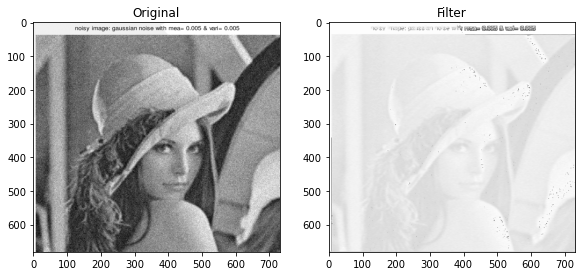

In [195]:
if __name__ == '__main__':
    im = cv2.imread('bhabhi.png' ,cv2.IMREAD_GRAYSCALE)
#     noised = random_noise(im,mode='gaussian',var=0.02)
#     gray1=im+noised
    gray_im = padding(im)
    
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
#     noised = random_noise(img,mode='gaussian',var=0.02)
    
    row = len(im)
    col = len(im[0])
    print(im[0, 0])
#     print(aish[0, 0])
    print(row)
    print(col)
    
    
    
    
#     for i in range(2,row-2):
#          for j in range(2,col-2):
#                 print(im[i, j])
    
    
    
    
    z = np.zeros([681, 731], dtype='float')
    
    e=0
    for i in range(2,row-2):
        for j in range(2,col-2):
            if im[i, j]>0 and im[i, j]<255:              
                pass
            elif (im[i, j]==0 or im[i, j]==255):
                c=0
                d=0
                flag=0
                for p in range(i-1,i+2):
                    for q in range(j-1,j+2):
                        if im[p, q]==0 or im[p, q]==255:
                            c=c+1
                        elif im[p, q]<10 or im[p, q]>245:
                            flag=1
#                             break
                        else:
                            d=d+1
#                     if flag==1:
#                         break
                   
                if d>0 and flag==0:
                    z[i, j]=1
#                 if flag==1:
#                     break  
                if c==8 or flag==1:
                    c=0
                    d=0
                    flag=0
                    for p in range(i-2,i+3):
                        for q in range(j-2,j+3):
                            if im[p, q]==0 or im[p,q]==255:
                                c=c+1
                            elif im[p, q]<10 or im[p, q]>245:
                                flag=1  
#                                 break
                            else:
                                d=d+1
                                
#                         if flag==1:
#                             break
                            
                            
                    if d>0 and flag==0:
                        z[i, j]=1
#                     if flag==1:
#                         break
                    if c==16 or flag==1:
                        c=0
                        d=0
                        flag=0
                        for p in range(i-3,i+4):
                            for q in range(j-3,j+4):
                                if im[p, q]==0 or im[p,q]==255:
                                    c=c+1
                                elif im[p, q]<10 or im[p, q]>245:
                                    flag=1  
                                    break
                                else:
                                    d=d+1
                                    
                            if d>0 and flag==0:
                                z[i, j]=1
                            if flag==1:
                                break
                                
                                
        
        
     
                                
                                
    
                
    output = np.zeros(im.shape, dtype='float')
   
    
    for i in range(2, row+2):
         for j in range(2, col+2):
                if z[i-2][j-2]==0:
                    fracdiff(im, gray_im, 4, 0.45, i, j)
                else:
                    fracint(im, gray_im, 4, 0.75, i, j)
    output = (-1 * output)
    
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(15)
        
    
    fig.add_subplot(3, 3, 1)
    plt.title('Original')                
    plt.imshow(im, cmap='gray')   
    
    fig.add_subplot(3, 3, 2)
    plt.title('Filter')
    plt.imshow(output, cmap='gray')
#     output.show()
#     plt.imshow(z, cmap='gray')

   
    
    
                
            
                    
    
                    
            
                    
    
                        
    
        
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
#     gray1=img+noised
#     cv2.imshow('bhabhi', noised)
#     cv2.imshow('bhabhi', im)
    
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()